# Lab 10a

## Exercise 1
The [Lotka–Volterra equations](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations), also known as the predator–prey equations, represent a model for an interacting predator and a prey population:
 
 $$ \frac{dx}{dt} = \alpha x - \beta x y$$ 
 
 $$\frac{dy}{dt} = \delta xy -\gamma y$$ 
 
 where:
 * $x$ number of prey
 * $y$ number of predators
 * and $\alpha$, $\beta$, $\delta$ and $\gamma$ are parameters that describe the interaction between the two species.
 
1. Write the code to solve the Lotka–Volterra equations equations using first the `scipy.integrate.odeint` and  then the `integrate.solve_ivp` method. 
2. Create a plot with the evolution of prey and predator for the parameters $\alpha=2/3$, $\beta=4/3$, $\delta=1$ and $\gamma=1/2$ for the time interval $[0,35]$ for each solution. Make a plot that shows the prey population which shows both solutions. Are you satisfied with the agreement?
3. Integrate the ODE with both solvers to $t=350$ and plot the prey population. Also zoom in to view in detail just the last 35 time units. Are you still satisfied? What is the solver you prefer, and why?

Note: make sure that you are using for each line a different compination of linestyle and color to make distinguishing the lines very easy.

I left some code snippets from my model solution in here. You can ignore them if you like.

In [26]:
import numpy as np
import scipy.integrate as i
import sympy as sp
import matplotlib.pyplot as plt
# from sympy.abc import x,t,y


In [27]:
# parameters and initial conditions
alpha=2/3; beta=4/3; delta=1.0; gamma=1/2
state0 = [0.2, 0.5]
tmin,tmax = (0,350)
n=100
t=np.linspace(tmin,tmax+1,n)
dt=t[-1]-t[-2]
xy=[0.2,0.5]

In [28]:
def f1(xy,t):
    x,y=xy
    return [x*(alpha-beta*y),(delta*x-gamma)*y]

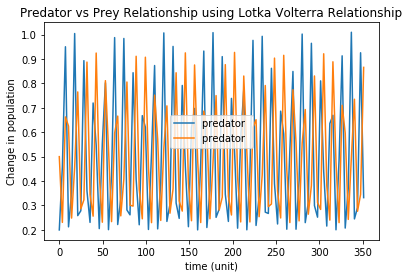

In [29]:
y=i.odeint(f1 , xy , t)
plt.plot(t,y,label="predator ")
plt.xlabel("time (unit)")
plt.ylabel("Change in population")
plt.title("Predator vs Prey Relationship using Lotka Volterra Relationship")
plt.legend()
plt.show()

In [30]:
# i.odeint?

### odeint solution

In [ ]:
ifig = 7; close(ifig); figure(ifig)

### solve_ivp solution

In [31]:
from scipy.integrate import solve_ivp
# solve_ivp?

In [32]:
rhs = lambda t,y: f1(xy,t)
sol = solve_ivp(rhs,t,xy)

In [33]:
# check solution
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 20
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.13641191, 1.50053102, 3.54545455])
 t_events: None
        y: array([[ 0.2       ,  0.2       ,  0.2       ,  0.2       ],
       [ 0.5       ,  0.47953821,  0.27492035, -0.03181818]])

ValueError: x and y must have same first dimension, but have shapes (100,) and (4,)

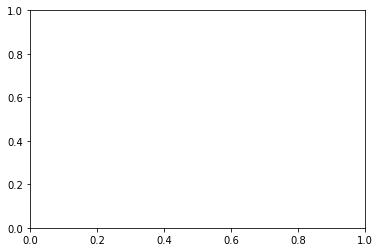

In [34]:
# ifig = 3; close(ifig); figure(ifig)
plt.plot(t,sol.y[0],label='prey')
pltplot(t,sol.y[1],label='predator')
plt.legend(loc=0); plt.xlabel('time'); plt.ylabel('population')
plt.title('solve_ivp')

In [8]:
solve_ivp?

Signature:
solve_ivp(
    ['fun', 't_span', 'y0', "method='RK45'", 't_eval=None', 'dense_output=False', 'events=None', 'vectorized=False', '**options'],
)
Docstring:
Solve an initial value problem for a system of ODEs.

This function numerically integrates a system of ordinary differential
equations given an initial value::

    dy / dt = f(t, y)
    y(t0) = y0

Here t is a one-dimensional independent variable (time), y(t) is an
n-dimensional vector-valued function (state), and an n-dimensional
vector-valued function f(t, y) determines the differential equations.
The goal is to find y(t) approximately satisfying the differential
equations, given an initial value y(t0)=y0.

Some of the solvers support integration in the complex domain, but note that
for stiff ODE solvers, the right-hand side must be complex-differentiable
(satisfy Cauchy-Riemann equations [11]_). To solve a problem in the complex
domain, pass y0 with a complex data type. Another option is always to
rewrite your problem 